In [1]:
%matplotlib inline
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2021. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this for some tasks.

The datasets are on Blackboard. Download them and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_id1_id2.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. 

* We may not grade all sub-questions (instead, we may choose a sub-set and scale the points). However, solve them as if they were.

Notes on implementation:

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical questions, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 
(40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

The questions below are about both the words in the corpus and POS tags. POS-tagging will be covered in week2 in the course, but you can already start to get familiar with the tags in English.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see (https://web.stanford.edu/~jurafsky/slp3/8.pdf)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 8.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [2]:
from collections import Counter

file = open("drive/MyDrive/NLP/Lab1/sec02-21.gold.tagged", 'r')
data = file.read()

tokens = data.split()
print("Token size: " + str(len(tokens)))

tokenCounter = Counter(tokens)
print("Vocabulary size: " + str(len(tokenCounter)))

lowerTokenCounter = Counter([token.lower() for token in tokens])
print("Vocabulary size(lowercase): " + str(len(lowerTokenCounter)))

Token size: 929552
Vocabulary size: 51643
Vocabulary size(lowercase): 48233


An advantage of lowercasing is that you get rid of cases when the same words are classified as different words because of a uppercase character, for example at the start of a sentence. A disatvantage is that special cases for example names are getting harder to find in a text, because everything is lowercase. Normally, uppercase would make it easier to find a name in text.

------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?

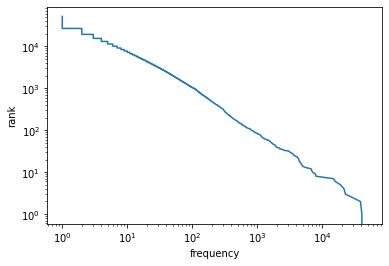

In [3]:
sortedTokens = {k: v for k, v in sorted(tokenCounter.items(), key=lambda item: item[1], reverse=True)}
freq = list(sortedTokens.values())
ranks = range(len(freq))

plt.loglog(freq, ranks)
plt.xlabel('frequency')
plt.ylabel('rank')
plt.show()

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [4]:
print("Top 20 words:")
for k, v in list(sortedTokens.items())[0:20]: # Up to 19th because we start at 0
  print( k.split('|')[0] + ": " + str(v))

(tokenFifty, amountFifty) = list(sortedTokens.items())[49] # List starts at 0
print("50th word:" + tokenFifty.split('|')[0] + ": " + str(amountFifty))

(tokenHundredth, amountHundredth) = list(sortedTokens.items())[99] # List starts at 0
print("100th word:" + tokenHundredth.split('|')[0] + ": " + str(amountHundredth))

(tokenThousandth, amountThousandth) = list(sortedTokens.items())[999] # List starts at 0
print("100th word:" + tokenThousandth.split('|')[0] + ": " + str(amountThousandth))

Top 20 words:
,: 48310
the: 40831
.: 38798
of: 22778
to: 21676
a: 19151
and: 15901
in: 14852
's: 8023
for: 7907
$: 7125
is: 6891
The: 6753
said: 5476
on: 4965
%: 4866
that: 4719
it: 4639
by: 4438
from: 4437
50th word:his: 1688
100th word:companies: 817
100th word:Judge: 106


**(d)** How many different Part-of-speech tags are present in the corpus?

In [ ]:
splitPOS = set([token.split('|')[1] for token in tokens])
print(str(len(splitPOS)) + " different POS tags")

48 different POS tags


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [ ]:
# get most used
sortedTokens = {k: v for k, v in sorted(tokenCounter.items(), key=lambda item: item[1], reverse=True)}
posCounts = Counter((token.split('|')[1] for token in tokens)).most_common(10)
posWords = {k: [] for k in dict(posCounts).keys()}

# loop through most used
for k, v in sortedTokens.items():
  pos = k.split('|')[1]
  if pos in posWords:
    # if pos does not yet have 3 we add it
    if len(posWords[pos]) < 3:
      posWords[pos].append(k.split('|')[0])
    
print("Top 10 most common pos tags, with 3 most common words")
print(*posWords.items(), sep='\n')

Top 10 most common pos tags, with 3 most common words
('NN', ['%', 'company', 'year'])
('IN', ['of', 'in', 'for'])
('NNP', ['Mr.', 'U.S.', 'Corp.'])
('DT', ['the', 'a', 'The'])
('JJ', ['new', 'other', 'last'])
('NNS', ['years', 'shares', 'sales'])
(',', [',', 'an', '2'])
('.', ['.', '?', '!'])
('CD', ['million', 'billion', 'one'])
('RB', ["n't", 'also', 'not'])


**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

In [ ]:
import itertools

wordPos = dict()
sortedWordTokens = dict()
words = 0

for token in tokens:
  (word, POS) = token.split("|")
  if word in wordPos.keys():
    if POS is not wordPos[word]:
      words += 1
    if POS in wordPos[word].keys():
      wordPos[word][POS] += 1
    else:
      wordPos[word][POS] = 1
  else:
    wordPos[word] = dict()
    wordPos[word][POS] = 1

print(str(words / len(tokens) * 100) + " words have multiple POS")

sortedwords = {k: sum(v.values()) for k, v in wordPos.items()}
sortedWordTokens = {k: wordPos[k] for k, v in sorted(sortedwords.items(), key=lambda item: item[1], reverse=True)}

print("10 most frequent combinations are:")
i = 11
for ntoken, Pos  in sortedWordTokens.items():
  if i > 0:
    sortedPos = {k: v for k, v in sorted(Pos.items(), key=lambda item: item[1], reverse=True)}
    print(ntoken + ": " + list(sortedPos)[0])
    i -= 1
  else:
    break;

95.24394547050622 words have multiple POS
10 most frequent combinations are:
,: ,
the: DT
.: .
of: IN
to: TO
a: DT
and: CC
in: IN
's: POS
that: IN
for: IN


**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.2 mentioned above to interpret the POS-tags.

In [ ]:
i = 6
for ntoken, Pos  in sortedWordTokens.items():
  if i > 0:
    sortedPos = {k: v for k, v in sorted(Pos.items(), key=lambda item: item[1], reverse=True)}
    print(ntoken + ": ")
    print(*sortedPos.items(), sep='\n')
    i -= 1
  else:
    break;

,: 
(',', 48310)
the: 
('DT', 40831)
('NNP', 5)
('JJ', 2)
('NN', 1)
.: 
('.', 38798)
of: 
('IN', 22778)
('RP', 2)
('RB', 2)
to: 
('TO', 21676)
('CC', 375)
('IN', 5)
a: 
('DT', 19151)
('SYM', 10)
('FW', 7)
('NNP', 2)
('LS', 1)


**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [ ]:
total_amb = 0
total = 0
for ntoken, Pos in sortedWordTokens.items():
  if len(Pos) > 1:
    total_amb += sum(list(Pos.values())[1:])
  total += sum(list(Pos.values()))

print(str(total_amb) +" of "+ str(total) + " is ambiguous")
print("So " + str((total_amb / total) * 100) + " is ambiguous")

74851 of 929552 is ambiguous
So 8.052373616537858 is ambiguous


## Exercise 1.2 
(10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

In [ ]:
devFile = open("drive/MyDrive/NLP/Lab1/sec00.gold.tagged", 'r')
devData = devFile.read()

devList = devData.split()

devUnseen = [word for word in devList if word not in tokens]
print('Amount of unseen words:', len(devUnseen))

Number of unseen words: 1982


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [ ]:
unseenPOS = [el.split('|')[1] for el in devUnseen]
unseenDict = dict(Counter(unseenPOS))
unseenDict = {k: v for k, v in sorted(unseenDict.items(), key=lambda item: item[1], reverse=True)}

commonUnseen = [item[0] for item in list(zip(unseenDict.keys()))[0:3]]
print('Top common unseen word POS tags:', commonUnseen)

Top common unseen word POS tags: ['NNP', 'JJ', 'NN']


# 2. Language Models



Reference **chapter 3** of JM3 *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method (https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 
(25 points, 15 and 10 for a and b)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. 

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

The following function is given:

In [10]:
from collections import defaultdict
from numpy import cumsum
from random import choice

In [8]:
train_file = "drive/MyDrive/NLP/Lab1/ted-train.txt"
def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            for w in words:
                i2w[w2i[w]] = w
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w
    
data, w2i, i2w = read(train_file)

In [48]:
def train_ngram(data, N, k=0):
    print('Counting probabilities')
    unigram = defaultdict(float, Counter(x for xs in data for x in xs))
    V = sum(unigram.values())
    ngram = defaultdict(lambda: defaultdict(lambda: k/(N+k*V)))
    
    for move in [(sentence[i:i+N]) for sentence in data for i in range(len(sentence)-N+1)]:
      ngram[tuple(move[:N-1])][move[N-1]] += 1

    print('Distributing probabilities')
    cond = ngram
    for gram in ngram:
      for word in ngram[gram]:
        cnt = ngram[gram][word];
        cond[gram][word] = cnt / unigram[gram[-1]]

    print('Done creating language model!')

    total = float(sum(unigram.values()))
    unigram = dict((word, count/total) for word, count in unigram.items())
    return ngram, unigram, cond

bigram, unigram, cond = train_ngram(data, N=2, k=0)
trigram, unigram, condTri = train_ngram(data, N=3, k=0)
bigram_smoothed, unigram_smoothed, cond_smoothed = train_ngram(data, N=2, k=1)
trigram_smoothed, unigram_smoothed, condTri_smoothed = train_ngram(data, N=3, k=1)

Counting probabilities
Distributing probabilities
Done creating language model!
Counting probabilities
Distributing probabilities
Done creating language model!
Counting probabilities
Distributing probabilities
Done creating language model!
Counting probabilities
Distributing probabilities
Done creating language model!


## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [24]:
def inverse_transform_sampling(word, cond):
    cs_word = cond[word,]
    cs_sortlist = list(cs_word.keys())
    cs_cumsum = cumsum(list(cs_word.values()))
    for i in range(len(cs_cumsum)):
      if random.random() < cs_cumsum[i]:
        return(cs_sortlist[i])

Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [28]:
  print('Training model:')
  bigram, unigram, cond = train_ngram(data, 2, k=0)
  print('Generating text')
  print('\n')
  text = []
  text.append('<s>')
  while text[-1] != '</s>':
    text.append(inverse_transform_sampling(text[-1], cond))
  text = ' '.join(text)
  print(text)

Training model:
Counting probabilities
Distributing probabilities
Done creating language model!
Generating text


<s> and making rent out of the crisis levels of blood sent Nick off of exploitation by the answers . </s>


### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [29]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word,]
    ds = smoothbigram[word,]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")    

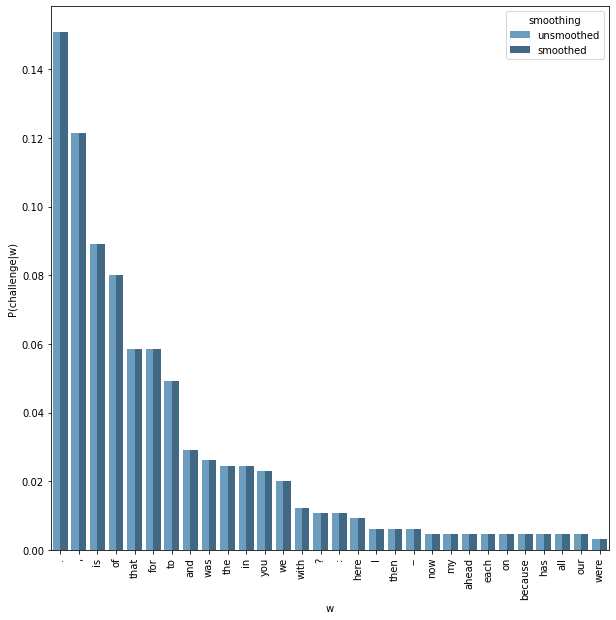

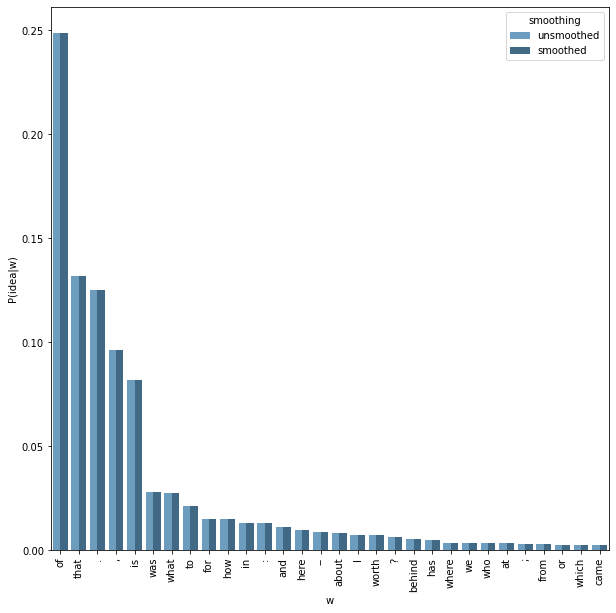

In [31]:
plot_bigram_dist('challenge', bigram, bigram_smoothed, k=30)
plot_bigram_dist('idea', bigram, bigram_smoothed, k=30)

(a) From the graphs above, no difference could be seen between the  smoothed and the unsmooted bigram distribution of frequent words. Similair to the frequent words, also the infrequent words do not show any differnce in the graph. Bellow, we look at the raw count of W.

In [42]:
print("No smoothing   " + str(cond['main',]['challenge']))
print("Smoothing      " + str(cond_smoothed['main',]['challenge']))
print("No smoothing   " + str(cond['main',]['idea']))
print("Smoothing      " + str(cond_smoothed['main',]['idea']))

no smoothing   0.0027472527472527475
Smoothing      0.002747253236370347
no smoothing   0.01098901098901099
Smoothing      0.01098901147812859


(b) Setting k between 0 - 1 results in the following:

Counting probabilities
Distributing probabilities
Done creating language model!


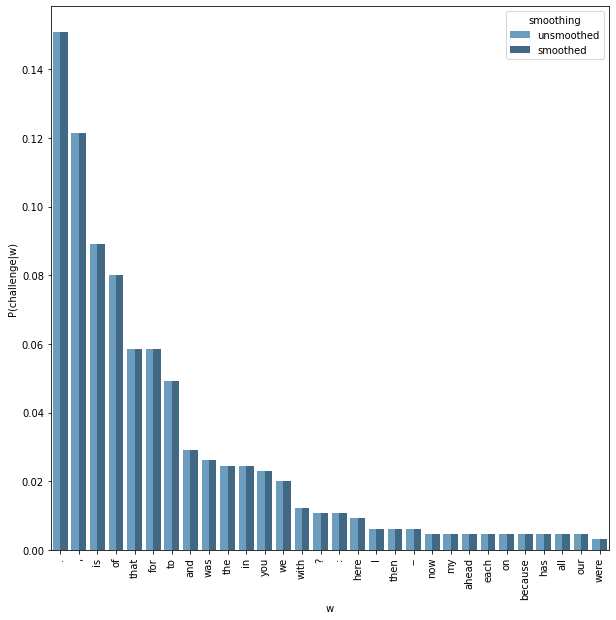

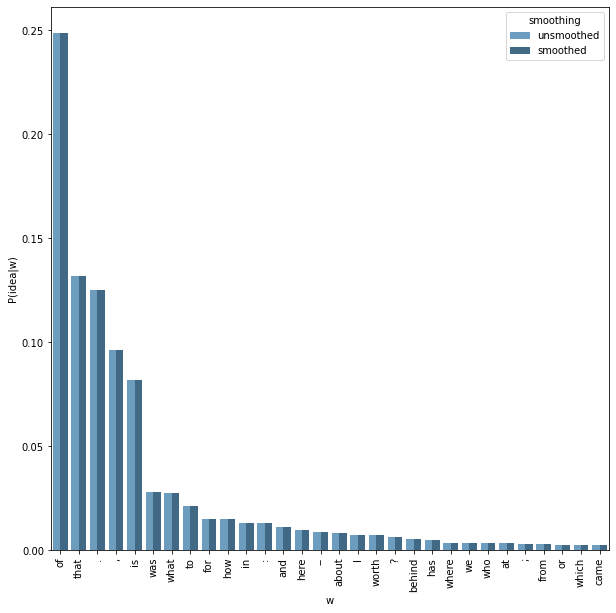

In [47]:
bigram_smoothed_small, unigram_smoothed_small, cond_smoothed_small = train_ngram(data, N=2, k=0.30)
plot_bigram_dist('challenge', bigram, bigram_smoothed_small, k=30)
plot_bigram_dist('idea', bigram, bigram_smoothed_small, k=30)

In [49]:
print("No smoothing   " + str(cond['main',]['challenge']))
print("Smoothing      " + str(cond_smoothed_small['main',]['challenge']))
print("No smoothing   " + str(cond['main',]['idea']))
print("Smoothing      " + str(cond_smoothed_small['main',]['idea']))

No smoothing   0.0027472527472527475
Smoothing      0.002747253236369941
No smoothing   0.01098901098901099
Smoothing      0.010989011478128183


After changing the K value, again from the graph not much difference could be seen. If we compare the raw results, the difference is very small. So the change in K did not make much of a difference.



**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [62]:
sentences = [
  'Every day was about creating something new .', 'In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .',
]

def createSentences(sentences):
  data2 = []
  w2i = defaultdict(lambda: len(w2i))
  i2w = dict()
  start = "<s>"
  end = "</s>"

  for line in sentences:
      words = line.strip().split()
      for w in words:
          i2w[w2i[w]] = w
      
      sent = [start] + words + [end]
      data2.append(sent)

  return data2
data2 = createSentences(sentences)

def calculateProbUnigram(sentence):
  prob = 1
  for word in sentence:
    prob *= unigram[word]
  return prob

def calculateProbBigram(sentence, model, N): #can be used for any gram N>1
  prob = 1
  for index in range(len(sentence)):
    if index >= N:
      arr = [sentence[index - (N-i)] for i in range(N)]
      prob *= model[tuple(arr[:-1])][arr[-1]]

  if prob == 0:
    print(sentence)
    print(prob)
  return prob

def calculateProbBigramLog(sentence, model, N):
  prob = 0
  for index in range(len(sentence)):
    if index >= N:
      arr = [sentence[index - (N-i)] for i in range(N)]
      prob += math.log(model[tuple(arr[:-1])][arr[-1]])
  return math.exp(prob)

In [54]:
print("Trigram: ", calculateProbBigram(data2[0], trigram, 3))
print("Trigram smoothed: ", calculateProbBigram(data2[0], trigram_smoothed, 3))
print("Trigram sentence 2: ", calculateProbBigram(data2[1], trigram, 3))
print("Trigram smoothed sentence 2: ", calculateProbBigram(data2[1], trigram_smoothed, 3))
print("")
print("Bigram: ", calculateProbBigram(data2[0], bigram, 2))
print("Bigram smoothed: ", calculateProbBigram(data2[0], bigram_smoothed, 2))
print("Bigram sentence 2: ", calculateProbBigram(data2[1], bigram, 2))
print("Bigram smoothed sentence 2: ", calculateProbBigram(data2[1], bigram_smoothed, 2))
print("")
print("Unigram smoothed: ", calculateProbUnigram(data2[0]))
print("Unigram smoothed sentence 2: ", calculateProbUnigram(data2[1]))

Trigram:  1.1268223114593695e-21
Trigram smoothed:  1.1268229763283591e-21
Trigram sentence 2:  5.700507786514413e-98
Trigram smoothed sentence 2:  5.7005268930514104e-98

Bigram:  4.667998867880972e-17
Bigram smoothed:  4.6679990581050084e-17
Bigram sentence 2:  2.0159953795734388e-72
Bigram smoothed sentence 2:  2.0159975855189895e-72

Unigram smoothed:  8.711492631550748e-27
Unigram smoothed sentence 2:  2.7545011290780525e-102


From the results it could be observed that the smoothing, just like above had a very small impact on the result. In these sentences, the smoothing did not have much difference.

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [69]:
newSentences = ['Because these robots are really safe .', 'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .']
newData = createSentences(newSentences)

print("Trigram: ", calculateProbBigram(newData[0], trigram, 3))
print("Trigram smoothed: ", calculateProbBigram(newData[0], trigram_smoothed, 3))
print("Trigram sentence 2: ", calculateProbBigram(newData[1], trigram, 3))
print("Trigram sentence 2 smoothed: ", calculateProbBigram(newData[1], trigram_smoothed, 3))
print()
print("Bigram: ", calculateProbBigram(newData[0], bigram, 2))
print("Bigram smoothed: ", calculateProbBigram(newData[0], bigram_smoothed, 2))

['<s>', 'Because', 'these', 'robots', 'are', 'really', 'safe', '.', '</s>']
0.0
Trigram:  0.0
Trigram smoothed:  7.814134496175058e-28
['<s>', 'We', 'have', 'sheer', 'nothingness', 'on', 'one', 'side', ',', 'and', 'we', 'have', 'this', 'vision', 'of', 'a', 'reality', 'that', 'encompasses', 'every', 'conceivable', 'world', 'at', 'the', 'other', 'extreme', ':', 'the', 'fullest', 'possible', 'reality', ',', 'nothingness', ',', 'the', 'simplest', 'possible', 'reality', '.', '</s>']
0.0
Trigram sentence 2:  0.0
Trigram sentence 2 smoothed:  1.0666624991280415e-155

Bigram:  2.6913665324688018e-15
Bigram smoothed:  2.691366843268513e-15


In the trigram, we see a big difference between the smoothed and the unsmoothed, the unsmoothed value is 0 and the smoothed is above 0.

The bigram does not show the results shown by the trigram, it is similair to the previous sentences.

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [ ]:
### ANSWER HERE ###

## Exercise 2.6 (5 points)

**Perplexity** is a frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [70]:
import math

total = 0
for sentence in data:
  try:
    total -= math.log(calculateProbBigramLog(sentence, trigram_smoothed, 3))
  except:
    total -= 0

wordCount = sum([len(sentence)-1 for sentence in data])
print("First: "+str(math.pow(2, total / wordCount)))

total = 0
for sentence in data:
  try:
    total -= math.log(calculateProbBigramLog(sentence, bigram_smoothed, 2))
  except:
    total -= 0

wordCount = sum([len(sentence)-1 for sentence in data])
print("Second: "+str(math.pow(2, total / wordCount)))

First: 70.43677584010271
Second: 18.291788592677324


It could be observed that the perplecity of the bigram much lower is than the trigram, which implies that the probability of the bigram model is higher.

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: 
https://www.maths.ed.ac.uk/~v1ranick/papers/wigner.pdf



Acknowledgements: Most of this lab was developed in collaboration with Joost Bastings and Dan Douwe.